In [14]:
packageurl <- "https://cran.r-project.org/src/contrib/Archive/ouch/ouch_2.9-2.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
library("ouch")
library("DescTools")
library("Biostrings")
library("seqinr")
library("stringr")
library("FNN")
library("ape")
library("RCurl")
library("diagram")
library("ggplot2")
library("corrplot")
library("qgraph")

In [15]:
ASR=read.csv("ASR_substitutions/PLD_changeList.csv")

In [16]:
ASR_states=matrix("", nrow = 1000, ncol = 2)
n=0

for (i in 1: dim(ASR)[1]){
    for (j in 1: dim(ASR)[2]){
        
        if (!is.na(nchar(as.character(ASR[i,j])))){
        if (nchar(as.character(ASR[i,j]))>0){
            n=n+1
            ASR_states[n,1]=str_split(as.character(ASR[i,j]), pattern = "→", simplify = TRUE)[1]
            ASR_states[n,2]=str_split(as.character(ASR[i,j]), pattern = "→", simplify = TRUE)[2]
            
        }
        }
        
    }
}

ASR_states=ASR_states[seq(1,n),]

In [17]:
## make single states
ASR_states=ASR_states[which(nchar(ASR_states[,2])==1),]
ASR_states[,2]=trimws(ASR_states[,2])
ASR_states[,1]=trimws(ASR_states[,1])

In [18]:
AAs=c("A", "R", "N", "D", "C", "Q","E", "G","H","I","L", "K", "M", "F", "P", "S", "T", "W", "Y", "V")
Substitutions=matrix(0,nrow = 20,ncol = 20)

for (i in 1:20){
    
    index_1=which(ASR_states[,1]==AAs[i])
    
    if (length(index_1)>0){
    for (j in 1:20){
        
        index_2=which(ASR_states[index_1,2]==AAs[j])
        
        Substitutions[i,j]=length(index_2)
        
    }
        }
    
}

In [19]:
colnames(Substitutions)=rownames(Substitutions)=AAs

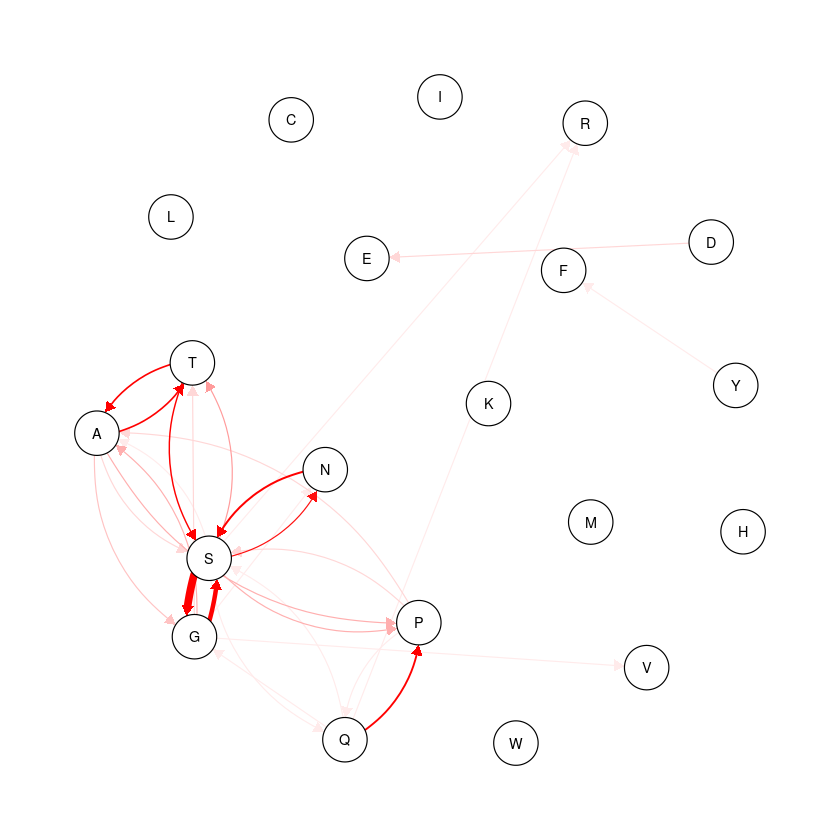

In [21]:
options(warn = -1)
qgraph(Substitutions, layout='spring', vsize=5,line = 30, overlay = TRUE, posCol = "red")

In [ ]:
Substitutions

write.csv(Substitutions, "Substitutions_ASR_All.csv")

#pdf("ASR_transition_map.pdf")
x=seq(1,dim(Substitutions)[1])
y=seq(1,dim(Substitutions)[2])
library(lattice)
n=10
levelplot(Substitutions, row.values = y, column.values = x, cuts = n, col.regions = colorRampPalette(c("white","red")))
#dev.off()